In [140]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix
from sklearn.tree import plot_tree

In [141]:
path = "Telco_customer_churn_adapted_v2.xlsx"
df = pd.read_excel(path, index_col=0)
df.head()

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
Customer ID,,,,,,,,,,,,,,,
0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0


In [142]:
# Reset index 'Customer ID'
df = df.reset_index(drop=True)
df = pd.DataFrame(df)
df

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,72,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Debit,27.495,No,106.816666,-6.2,6897.8
7039,24,Jakarta,Mid End,Yes,No,Yes,Yes,Yes,Yes,Digital Wallet,110.240,No,106.816666,-6.2,2782.0
7040,72,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Credit,134.160,No,106.816666,-6.2,7228.0
7041,11,Jakarta,Mid End,Yes,No,No,No,No,No,Pulsa,38.480,No,106.816666,-6.2,3630.9


In [143]:
df.rename(columns={'Monthly Purchase (Thou. IDR)': 'Monthly Purchase'}, inplace=True)
df

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase,Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,72,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Debit,27.495,No,106.816666,-6.2,6897.8
7039,24,Jakarta,Mid End,Yes,No,Yes,Yes,Yes,Yes,Digital Wallet,110.240,No,106.816666,-6.2,2782.0
7040,72,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Credit,134.160,No,106.816666,-6.2,7228.0
7041,11,Jakarta,Mid End,Yes,No,No,No,No,No,Pulsa,38.480,No,106.816666,-6.2,3630.9


In [144]:
df.rename(columns={'CLTV (Predicted Thou. IDR)': 'CLTV'}, inplace=True)
df

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase,Churn Label,Longitude,Latitude,CLTV
0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,72,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Debit,27.495,No,106.816666,-6.2,6897.8
7039,24,Jakarta,Mid End,Yes,No,Yes,Yes,Yes,Yes,Digital Wallet,110.240,No,106.816666,-6.2,2782.0
7040,72,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Credit,134.160,No,106.816666,-6.2,7228.0
7041,11,Jakarta,Mid End,Yes,No,No,No,No,No,Pulsa,38.480,No,106.816666,-6.2,3630.9


# Drop Kolom

In [145]:
df = df.drop(columns=['Longitude', 'Latitude'])
df

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase,Churn Label,CLTV
0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,4210.7
1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,3511.3
2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,6983.6
3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,6503.9
4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,6942.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,72,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Debit,27.495,No,6897.8
7039,24,Jakarta,Mid End,Yes,No,Yes,Yes,Yes,Yes,Digital Wallet,110.240,No,2782.0
7040,72,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Credit,134.160,No,7228.0
7041,11,Jakarta,Mid End,Yes,No,No,No,No,No,Pulsa,38.480,No,3630.9


# Feature Engineering

**Keterangan**
* Tenure months
    * pelanggan baru: 0 -12
    * pelanggan lama: 13 - 48
    * pelanggan setia: > 48
* Monthly purchase
    * low: < 50
    * medium: 50 -100
    * high: > 100
* CLTV
    * low: < 4000
    * medium: 4000 - 6000
    * high: > 6000

In [146]:
tenure_bins = [0, 12, 48, float("inf")]
tenure_labels = ['Pelanggan Baru', 'Pelanggan Lama', 'Pelanggan Setia']

purchase_bins = [-float("inf"), 50, 100, float("inf")]
purchase_labels = ['Low', 'Medium', 'High']

cltv_bins = [-float("inf"), 4000, 6000, float("inf")]
cltv_labels = ['Low', 'Medium', 'High']

df['Tenure Months'] = pd.cut(df['Tenure Months'], bins=tenure_bins, labels=tenure_labels)
df['Monthly Purchase'] = pd.cut(df['Monthly Purchase'], bins=purchase_bins, labels=purchase_labels)
df['CLTV'] = pd.cut(df['CLTV'], bins=cltv_bins, labels=cltv_labels)

df

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase,Churn Label,CLTV
0,Pelanggan Baru,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,Medium,Yes,Medium
1,Pelanggan Baru,Jakarta,High End,No,No,No,No,No,No,Pulsa,Medium,Yes,Low
2,Pelanggan Baru,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,High,Yes,High
3,Pelanggan Lama,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,High,Yes,High
4,Pelanggan Setia,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,High,Yes,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Pelanggan Setia,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Debit,Low,No,High
7039,Pelanggan Lama,Jakarta,Mid End,Yes,No,Yes,Yes,Yes,Yes,Digital Wallet,High,No,Low
7040,Pelanggan Setia,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Credit,High,No,High
7041,Pelanggan Baru,Jakarta,Mid End,Yes,No,No,No,No,No,Pulsa,Low,No,Low


In [147]:
df['Tenure Months'] = df['Tenure Months'].astype('object')
df['Monthly Purchase'] = df['Monthly Purchase'].astype('object')
df['CLTV'] = df['CLTV'].astype('object')

# Split Data

In [148]:
# Split dataset
X = df.drop(columns=['Churn Label'])
y = df['Churn Label']

In [149]:
y = y.map({'Yes': 1, 'No': 0})

In [150]:
# Split data into training and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Split data training into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)
print("Jumlah X_train: ", X_train.shape)
print("Jumlah y_train: ", y_train.shape)
print("Jumlah X_val: ", X_val.shape)
print("Jumlah y_val: ", y_val.shape)
print("Jumlah X_test: ", X_test.shape)
print("Jumlah y_test: ", y_test.shape)

Jumlah X_train:  (4507, 12)
Jumlah y_train:  (4507,)
Jumlah X_val:  (1127, 12)
Jumlah y_val:  (1127,)
Jumlah X_test:  (1409, 12)
Jumlah y_test:  (1409,)


In [151]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4507 entries, 4806 to 6651
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Tenure Months      4498 non-null   object
 1   Location           4507 non-null   object
 2   Device Class       4507 non-null   object
 3   Games Product      4507 non-null   object
 4   Music Product      4507 non-null   object
 5   Education Product  4507 non-null   object
 6   Call Center        4507 non-null   object
 7   Video Product      4507 non-null   object
 8   Use MyApp          4507 non-null   object
 9   Payment Method     4507 non-null   object
 10  Monthly Purchase   4507 non-null   object
 11  CLTV               4507 non-null   object
dtypes: object(12)
memory usage: 457.7+ KB


In [152]:
X_train

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase,CLTV
4806,Pelanggan Lama,Jakarta,High End,No,No,No,No,Yes,Yes,Pulsa,High,Medium
3409,Pelanggan Lama,Jakarta,High End,No,No,No,Yes,No,No,Credit,High,High
3339,Pelanggan Lama,Jakarta,High End,No,Yes,No,No,Yes,No,Pulsa,High,High
3541,Pelanggan Setia,Jakarta,High End,Yes,Yes,Yes,Yes,Yes,Yes,Credit,High,High
4009,Pelanggan Baru,Jakarta,Mid End,Yes,Yes,Yes,Yes,Yes,Yes,Digital Wallet,Medium,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
1050,Pelanggan Lama,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Pulsa,High,Low
1409,Pelanggan Baru,Jakarta,Mid End,No,No,No,Yes,No,No,Pulsa,Medium,Medium
6834,Pelanggan Setia,Jakarta,Mid End,Yes,No,Yes,No,No,No,Digital Wallet,Low,High
5685,Pelanggan Baru,Bandung,Mid End,No,No,No,No,No,No,Debit,Medium,High


In [153]:
X_test

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase,CLTV
185,Pelanggan Lama,Jakarta,High End,No,Yes,No,No,No,Yes,Debit,High,Medium
2715,Pelanggan Lama,Jakarta,Mid End,No,Yes,No,No,No,No,Credit,Medium,High
3825,Pelanggan Baru,Bandung,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Digital Wallet,Low,Low
1807,Pelanggan Baru,Bandung,High End,No,Yes,No,No,No,Yes,Pulsa,High,High
132,Pelanggan Lama,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Debit,High,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
6366,Pelanggan Setia,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Pulsa,High,High
315,Pelanggan Lama,Jakarta,High End,No,No,No,No,No,Yes,Debit,High,High
2439,Pelanggan Baru,Jakarta,High End,Yes,Yes,No,No,Yes,No,Pulsa,High,High
5002,Pelanggan Setia,Bandung,High End,Yes,Yes,Yes,No,Yes,Yes,Pulsa,High,Medium


# One Hot Encoding

In [154]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_columns = encoder.fit_transform(X_train)
df_encoded = pd.DataFrame(encoded_columns)
df_encoded.index = X_train.index
X_train_encoded = df_encoded
X_train_encoded

c:\Users\marse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
4806,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3409,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3339,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3541,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4009,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1409,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
6834,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5685,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [155]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_columns = encoder.fit_transform(X_val)
df_encoded = pd.DataFrame(encoded_columns)
df_encoded.index = X_val.index
X_val_encoded = df_encoded
X_val_encoded

c:\Users\marse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
3575,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4958,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1447,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3334,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4041,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4225,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4416,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2451,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3201,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [156]:
OH_cols_test = pd.DataFrame(encoder.transform(X_test))
df_encoded = pd.DataFrame(OH_cols_test)
df_encoded.index = X_test.index
X_test_encoded = df_encoded
X_test_encoded

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
185,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2715,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3825,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1807,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
132,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6366,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
315,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2439,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
5002,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


# Model

In [157]:
y_train

4806    0
3409    0
3339    0
3541    0
4009    0
       ..
1050    1
1409    1
6834    0
5685    0
6651    0
Name: Churn Label, Length: 4507, dtype: int64

In [158]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train_encoded, y_train)

RandomForestClassifier()

# Hyperparameter Tuning

In [159]:
param_distributions = {'n_estimators': [10, 50, 100, 200],
                       'max_depth': [None, 5, 10, 20],
                       'min_samples_split': [2, 5, 10],
                       'min_samples_leaf': [1, 2, 4]}

In [160]:
random_search = RandomizedSearchCV(random_forest, param_distributions, n_iter=10, cv=5, error_score='raise')
random_search.fit(X_train_encoded, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 5, 10, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200]})

In [161]:
rf_best = random_search.best_estimator_
rf_best.fit(X_train_encoded, y_train)

RandomForestClassifier(max_depth=5, n_estimators=50)

# Evaluation

In [162]:
y_pred = rf_best.predict(X_val_encoded)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       845
           1       0.66      0.39      0.49       282

    accuracy                           0.80      1127
   macro avg       0.74      0.66      0.68      1127
weighted avg       0.78      0.80      0.78      1127



In [163]:
y_test_pred = rf_best.predict(X_test_encoded)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1009
           1       0.71      0.40      0.51       400

    accuracy                           0.78      1409
   macro avg       0.75      0.67      0.69      1409
weighted avg       0.77      0.78      0.76      1409



[[0.63682072 0.36317928]]


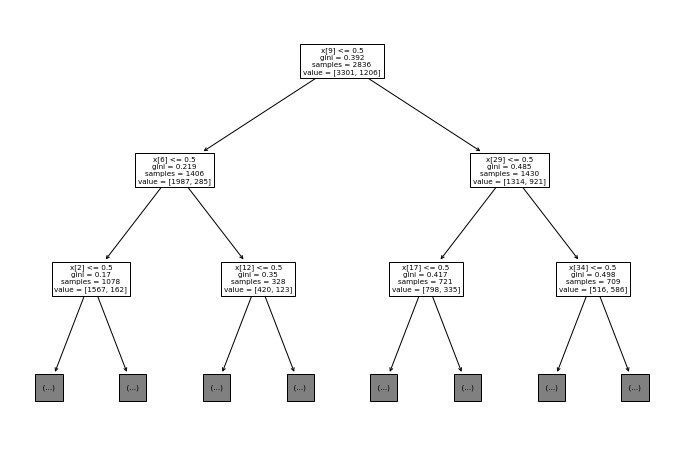

In [164]:
# Plot decision tree pertama di random forest
fig, ax = plt.subplots(figsize=(12, 8))
plot_tree(rf_best.estimators_[0], max_depth=2, ax=ax)
# Untuk memvisualisasikan probabilitas kelas di setiap node, gunakan metode `predict_proba` di seluruh random forest
# Misalnya untuk memprediksi probabilitas kelas untuk contoh pertama dalam test set:
probs = rf_best.predict_proba(X_test_encoded[:1])
print(probs)

In [165]:
y_test

185     1
2715    0
3825    0
1807    1
132     1
       ..
6366    0
315     1
2439    0
5002    0
1161    1
Name: Churn Label, Length: 1409, dtype: int64

In [166]:
y_test

185     1
2715    0
3825    0
1807    1
132     1
       ..
6366    0
315     1
2439    0
5002    0
1161    1
Name: Churn Label, Length: 1409, dtype: int64

In [167]:
y_pred_proba = rf_best.predict_proba(X_test_encoded)[:, 1]
y_pred_proba

array([0.36317928, 0.20941878, 0.13308987, ..., 0.51034718, 0.21361948,
       0.45092907])

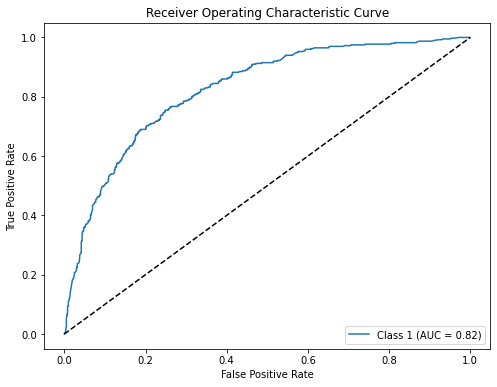

In [168]:
y_pred_proba = rf_best.predict_proba(X_test_encoded)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Class 1 (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Confusion Matrix')

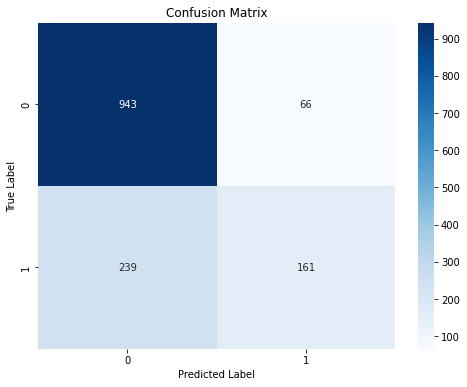

In [169]:
# Hitung confusion matrix
y_pred = rf_best.predict(X_test_encoded)
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Wrong Prediction

In [170]:
# Visualize observations that were incorrectly labeled
df_X_test_new = X_test[y_test != y_pred]
df_X_test_new

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase,CLTV
185,Pelanggan Lama,Jakarta,High End,No,Yes,No,No,No,Yes,Debit,High,Medium
132,Pelanggan Lama,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Debit,High,Medium
3732,Pelanggan Baru,Jakarta,High End,No,No,Yes,No,Yes,No,Pulsa,High,High
1672,Pelanggan Lama,Jakarta,High End,Yes,No,No,Yes,Yes,No,Pulsa,High,High
811,Pelanggan Baru,Jakarta,Mid End,No,No,No,No,No,No,Digital Wallet,Low,High
...,...,...,...,...,...,...,...,...,...,...,...,...
926,Pelanggan Lama,Bandung,High End,No,No,No,Yes,Yes,Yes,Pulsa,High,Medium
15,Pelanggan Lama,Jakarta,High End,Yes,Yes,No,No,Yes,Yes,Credit,High,Low
315,Pelanggan Lama,Jakarta,High End,No,No,No,No,No,Yes,Debit,High,High
2439,Pelanggan Baru,Jakarta,High End,Yes,Yes,No,No,Yes,No,Pulsa,High,High


In [171]:
# Visualize observations that were incorrectly labeled
df_y_test_new = pd.DataFrame(y_test[y_test != y_pred])
df_y_test_new

,Churn Label
185,1
132,1
3732,0
1672,1
811,1
...,...
926,1
15,1
315,1
2439,0


In [180]:
# Mengambil nomor index
index_df = df_y_test_new.index
index_df = pd.DataFrame(index_df)
index_df.rename({0 : 'index_df'}, axis=1, inplace=True)
index_df

,index_df
0,185
1,132
2,3732
3,1672
4,811
...,...
300,926
301,15
302,315
303,2439


In [199]:
# Visualize observations that were incorrectly labeled
df_y_pred_new = pd.DataFrame(y_pred[y_test != y_pred])
df_y_pred_new = pd.concat([df_y_pred_new, index_df], axis=1)
df_y_pred_new = df_y_pred_new.set_index(df_y_pred_new['index_df'])

In [200]:
df_y_pred_new.drop('index_df', axis=1, inplace=True)
df_y_pred_new.index.name = None

In [201]:
df_y_pred_new

,0
185,0
132,0
3732,1
1672,0
811,0
...,...
926,0
15,0
315,0
2439,1


In [202]:
# df_X_test_new.reset_index(drop=True, inplace=True)
# df_y_test_new.reset_index(drop=True, inplace=True)
# df_y_pred_new.reset_index(drop=True, inplace=True)

frames = [df_X_test_new, df_y_test_new, df_y_pred_new]
df_new = pd.concat(frames, axis=1)
df_new = df_new.rename(columns={0: 'Predicted Label'}) 
df_new

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase,CLTV,Churn Label,Predicted Label
185,Pelanggan Lama,Jakarta,High End,No,Yes,No,No,No,Yes,Debit,High,Medium,1,0
132,Pelanggan Lama,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Debit,High,Medium,1,0
3732,Pelanggan Baru,Jakarta,High End,No,No,Yes,No,Yes,No,Pulsa,High,High,0,1
1672,Pelanggan Lama,Jakarta,High End,Yes,No,No,Yes,Yes,No,Pulsa,High,High,1,0
811,Pelanggan Baru,Jakarta,Mid End,No,No,No,No,No,No,Digital Wallet,Low,High,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,Pelanggan Lama,Bandung,High End,No,No,No,Yes,Yes,Yes,Pulsa,High,Medium,1,0
15,Pelanggan Lama,Jakarta,High End,Yes,Yes,No,No,Yes,Yes,Credit,High,Low,1,0
315,Pelanggan Lama,Jakarta,High End,No,No,No,No,No,Yes,Debit,High,High,1,0
2439,Pelanggan Baru,Jakarta,High End,Yes,Yes,No,No,Yes,No,Pulsa,High,High,0,1


# Conditional Statement 

In [203]:
condition = (df_new['Tenure Months'] == 'Pelanggan Lama') & (df_new['Payment Method'] == 'Pulsa') & (df_new['Device Class'] == 'High End')
df_new.loc[condition, 'Predicted Label'] = 1
df_new

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase,CLTV,Churn Label,Predicted Label
185,Pelanggan Lama,Jakarta,High End,No,Yes,No,No,No,Yes,Debit,High,Medium,1,0
132,Pelanggan Lama,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Debit,High,Medium,1,0
3732,Pelanggan Baru,Jakarta,High End,No,No,Yes,No,Yes,No,Pulsa,High,High,0,1
1672,Pelanggan Lama,Jakarta,High End,Yes,No,No,Yes,Yes,No,Pulsa,High,High,1,1
811,Pelanggan Baru,Jakarta,Mid End,No,No,No,No,No,No,Digital Wallet,Low,High,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,Pelanggan Lama,Bandung,High End,No,No,No,Yes,Yes,Yes,Pulsa,High,Medium,1,1
15,Pelanggan Lama,Jakarta,High End,Yes,Yes,No,No,Yes,Yes,Credit,High,Low,1,0
315,Pelanggan Lama,Jakarta,High End,No,No,No,No,No,Yes,Debit,High,High,1,0
2439,Pelanggan Baru,Jakarta,High End,Yes,Yes,No,No,Yes,No,Pulsa,High,High,0,1


In [204]:
condition = (df_new['Tenure Months'] == 'Pelanggan Baru') & (df_new['Payment Method'] == 'Pulsa') & (df_new['Device Class'] == 'High End')
df_new.loc[condition, 'Predicted Label'] = 0
df_new

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase,CLTV,Churn Label,Predicted Label
185,Pelanggan Lama,Jakarta,High End,No,Yes,No,No,No,Yes,Debit,High,Medium,1,0
132,Pelanggan Lama,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Debit,High,Medium,1,0
3732,Pelanggan Baru,Jakarta,High End,No,No,Yes,No,Yes,No,Pulsa,High,High,0,0
1672,Pelanggan Lama,Jakarta,High End,Yes,No,No,Yes,Yes,No,Pulsa,High,High,1,1
811,Pelanggan Baru,Jakarta,Mid End,No,No,No,No,No,No,Digital Wallet,Low,High,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,Pelanggan Lama,Bandung,High End,No,No,No,Yes,Yes,Yes,Pulsa,High,Medium,1,1
15,Pelanggan Lama,Jakarta,High End,Yes,Yes,No,No,Yes,Yes,Credit,High,Low,1,0
315,Pelanggan Lama,Jakarta,High End,No,No,No,No,No,Yes,Debit,High,High,1,0
2439,Pelanggan Baru,Jakarta,High End,Yes,Yes,No,No,Yes,No,Pulsa,High,High,0,0


In [207]:
excel_file_path = "cluster-cust-id.xlsx"
df_new.to_excel(excel_file_path) 
print(f"DataFrame has been exported to {excel_file_path}")

DataFrame has been exported to cluster-cust-id.xlsx


# Merge dengan yang benar

In [208]:
# Visualize observations that were correctly labeled
df_X_test_new = X_test[y_test == y_pred]
df_X_test_new

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase,CLTV
2715,Pelanggan Lama,Jakarta,Mid End,No,Yes,No,No,No,No,Credit,Medium,High
3825,Pelanggan Baru,Bandung,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Digital Wallet,Low,Low
1807,Pelanggan Baru,Bandung,High End,No,Yes,No,No,No,Yes,Pulsa,High,High
1263,Pelanggan Baru,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Pulsa,High,High
2526,Pelanggan Lama,Bandung,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Credit,Low,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
2481,Pelanggan Lama,Jakarta,High End,No,No,No,No,Yes,No,Digital Wallet,High,High
5481,Pelanggan Setia,Bandung,High End,No,Yes,No,Yes,Yes,No,Pulsa,High,High
3404,Pelanggan Setia,Jakarta,Mid End,Yes,Yes,Yes,Yes,No,Yes,Credit,High,High
6366,Pelanggan Setia,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Pulsa,High,High


In [209]:
# Visualize observations that were correctly labeled
df_y_test_new = pd.DataFrame(y_test[y_test == y_pred])
df_y_test_new

,Churn Label
2715,0
3825,0
1807,1
1263,1
2526,0
...,...
2481,0
5481,0
3404,0
6366,0


In [210]:
# Visualize observations that were correctly labeled
df_y_pred_new = pd.DataFrame(y_pred[y_test == y_pred])
df_y_pred_new

,0
0,0
1,0
2,1
3,1
4,0
...,...
1099,0
1100,0
1101,0
1102,0


In [211]:
df_X_test_new.reset_index(drop=True, inplace=True)
df_y_test_new.reset_index(drop=True, inplace=True)
df_y_pred_new.reset_index(drop=True, inplace=True)

frames = [df_X_test_new, df_y_test_new, df_y_pred_new]
df_new_2 = pd.concat(frames, axis=1)
df_new_2 = df_new_2.rename(columns={0: 'Predicted Label'}) 
df_new_2

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase,CLTV,Churn Label,Predicted Label
0,Pelanggan Lama,Jakarta,Mid End,No,Yes,No,No,No,No,Credit,Medium,High,0,0
1,Pelanggan Baru,Bandung,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Digital Wallet,Low,Low,0,0
2,Pelanggan Baru,Bandung,High End,No,Yes,No,No,No,Yes,Pulsa,High,High,1,1
3,Pelanggan Baru,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Pulsa,High,High,1,1
4,Pelanggan Lama,Bandung,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Credit,Low,Low,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,Pelanggan Lama,Jakarta,High End,No,No,No,No,Yes,No,Digital Wallet,High,High,0,0
1100,Pelanggan Setia,Bandung,High End,No,Yes,No,Yes,Yes,No,Pulsa,High,High,0,0
1101,Pelanggan Setia,Jakarta,Mid End,Yes,Yes,Yes,Yes,No,Yes,Credit,High,High,0,0
1102,Pelanggan Setia,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Pulsa,High,High,0,0


In [212]:
result = pd.concat([df_new, df_new_2], axis=0)
result

,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase,CLTV,Churn Label,Predicted Label
185,Pelanggan Lama,Jakarta,High End,No,Yes,No,No,No,Yes,Debit,High,Medium,1,0
132,Pelanggan Lama,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Debit,High,Medium,1,0
3732,Pelanggan Baru,Jakarta,High End,No,No,Yes,No,Yes,No,Pulsa,High,High,0,0
1672,Pelanggan Lama,Jakarta,High End,Yes,No,No,Yes,Yes,No,Pulsa,High,High,1,1
811,Pelanggan Baru,Jakarta,Mid End,No,No,No,No,No,No,Digital Wallet,Low,High,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,Pelanggan Lama,Jakarta,High End,No,No,No,No,Yes,No,Digital Wallet,High,High,0,0
1100,Pelanggan Setia,Bandung,High End,No,Yes,No,Yes,Yes,No,Pulsa,High,High,0,0
1101,Pelanggan Setia,Jakarta,Mid End,Yes,Yes,Yes,Yes,No,Yes,Credit,High,High,0,0
1102,Pelanggan Setia,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Pulsa,High,High,0,0


In [213]:
result['Predicted Label'] = pd.to_numeric(result['Predicted Label'], errors='coerce').astype(int)
print(result.dtypes)

Tenure Months        object
Location             object
Device Class         object
Games Product        object
Music Product        object
Education Product    object
Call Center          object
Video Product        object
Use MyApp            object
Payment Method       object
Monthly Purchase     object
CLTV                 object
Churn Label           int64
Predicted Label       int32
dtype: object


In [214]:
from sklearn.metrics import f1_score
f1 = f1_score(result['Churn Label'], result['Predicted Label'])
print("F1 Score:", f1)

F1 Score: 0.6771159874608151


In [215]:
cm = confusion_matrix(result['Churn Label'], result['Predicted Label'])
cm

array([[987,  22],
       [184, 216]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

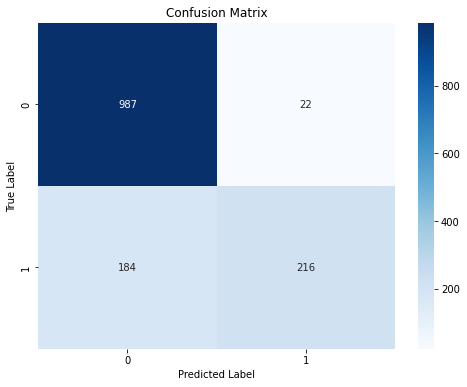

In [216]:
conf_matrix = confusion_matrix(result['Churn Label'], result['Predicted Label'])
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')